<class 'numpy.ndarray'> : [[-4.82009419  0.31265986]
 [-4.85798902 -0.75532612]
 [-5.87148063  0.18708564]
 ...
 [-5.41918388  1.18580916]
 [-8.33802005  3.63740559]
 [-3.54957757  1.52533045]]


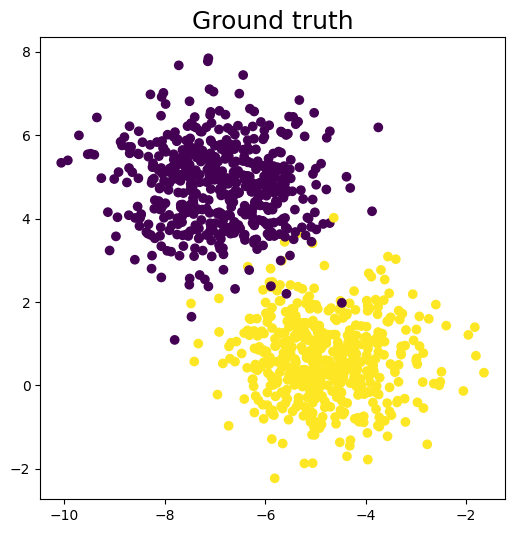

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Generate dataset
X, Y = make_blobs(n_features=2, centers=2, n_samples=1000, random_state=12)
print(type(X),":",X)

# Visualize dataset
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Ground truth', fontsize=18)
plt.show()


In [3]:
# initialize weights with random values
w = np.random.rand(3,1)
print(w)


[[0.22763898]
 [0.56769908]
 [0.31756415]]


In [4]:
# Add a bias to the input vector
X_bias = np.ones((X.shape[0], 3))
print(X_bias)
X_bias[:, 1:3] = X
print(X_bias)


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[ 1.         -4.82009419  0.31265986]
 [ 1.         -4.85798902 -0.75532612]
 [ 1.         -5.87148063  0.18708564]
 ...
 [ 1.         -5.41918388  1.18580916]
 [ 1.         -8.33802005  3.63740559]
 [ 1.         -3.54957757  1.52533045]]


In [5]:
def activation_func(z):
    if z >= 1:
        return 1
    else:
        return 0

for _ in range(100):
    for i in range(X_bias.shape[0]):
        y = activation_func(w.transpose().dot(X_bias[i, :]))
        # Update weights
        w = w + ((Y[i] - y) * X_bias[i, :]).reshape(w.shape[0], 1)


In [6]:
# predicting the class of the datapoints
result_class = [activation_func(w.transpose().dot(x)) for x in X_bias]


[[ 0.97883762]
 [ 0.08689284]
 [-0.18527427]]


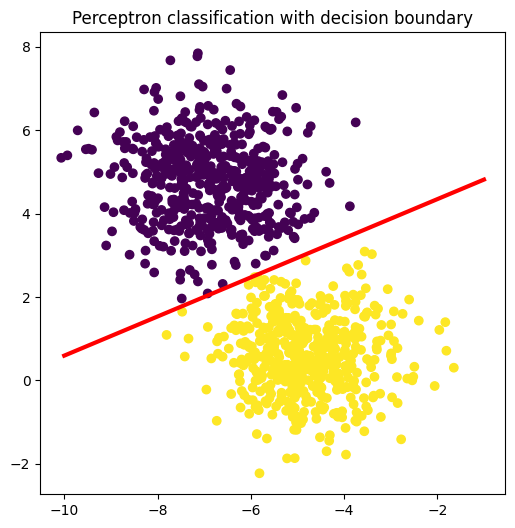

In [7]:
# convert to unit vector
w1 = w/np.sqrt(w.transpose().dot(w))
print(w1)

# Visualize results
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=result_class)

xx = np.linspace(-10, -1)
yy = -w1[1]*xx/w1[2] - w1[0]/w1[2]

plt.plot(xx, yy, lw=3, c='red')
plt.title('Perceptron classification with decision boundary')
plt.show()


LOGIC GATES USING PERCEPTRON

In [8]:
# initialize weights with random values
w_p = np.random.rand(3,1)
print(w_p)


[[0.44697818]
 [0.84114952]
 [0.13085994]]


In [9]:
X1 = np.array([[0,0],[0,1],[1,0],[1,1]])
Y1 = np.array([0,1,1,1])

# Add bias to the input vector
X1_bias = np.ones((X1.shape[0], 3))
print(X1_bias)
X1_bias[:, 1:3] = X1
print(X1_bias)


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


In [10]:
def activation_func(z):
    if z >= 0:
        return 1
    else:
        return 0

for _ in range(100):
    for i in range(X1_bias.shape[0]):
        y1 = activation_func(w_p.transpose().dot(X1_bias[i, :]))
        # Update weights
        w_p = w_p + ((Y1[i] - y1) * X1_bias[i, :]).reshape(w_p.shape[0], 1)


[0 1 0 1]


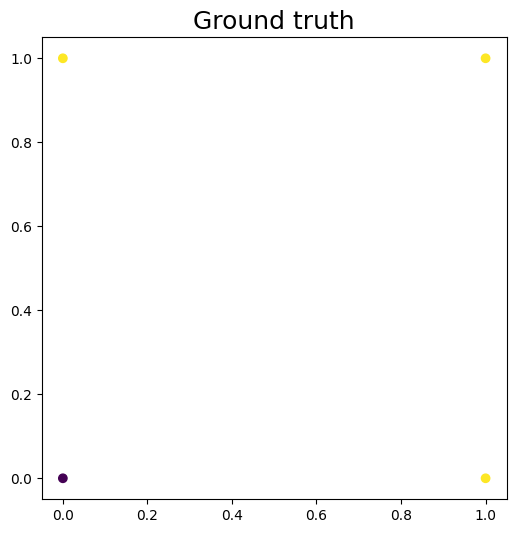

In [11]:
print(X1[:,1])

plt.figure(figsize=(6,6))
plt.scatter(X1[:,0], X1[:,1], c=Y1)
plt.title('Ground truth', fontsize=18)
plt.show()


[[-0.3652709 ]
 [ 0.55557925]
 [ 0.74693298]]


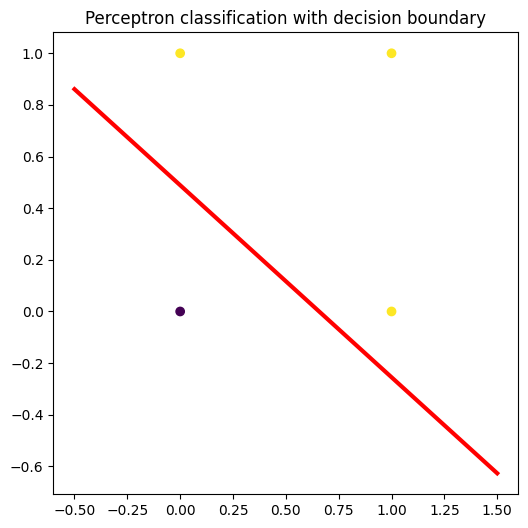

In [12]:
# predicting the class of the datapoints
result_class = [activation_func(w_p.transpose().dot(x1)) for x1 in X1_bias]

# convert to unit vector
w2 = w_p/np.sqrt(w_p.transpose().dot(w_p))
print(w2)

# Visualize results
plt.figure(figsize=(6,6))
plt.scatter(X1[:,0], X1[:,1], c=result_class)

xx = np.linspace(-0.5,1.5)
yy = -w2[1]*xx/w2[2] - w2[0]/w2[2]

plt.plot(xx, yy, lw=3, c='red')
plt.title('Perceptron classification with decision boundary')
plt.show()


PERCEPTRON FUNCTION FOR LOGIC GATES

In [13]:
#Perceptron model
import numpy as np

def perceptron(weights, inputs, bias):
    model = np.add(np.dot(inputs, weights), bias)
    logit = activation_function(model, type="sigmoid")
    return np.round(logit)


In [14]:
#Activation function
def activation_function(model, type="sigmoid"):
    return {
        "sigmoid": 1 / (1 + np.exp(-model))
    }[type]


In [15]:
#Compute function
def compute(data, logic_gate, weights, bias):
    weights = np.array(weights)
    output = np.array([ perceptron(weights, datum, bias) for datum in data ])
    return output


In [16]:
def print_template(dataset, name, data):
    print("#" * 6 + name.upper())
    print("X0\tX1\tX2\tY")
    toPrint = [ "{}\t{}\t{}\t{}".format(output, *datas) for datas, output in zip(data, dataset) ]
    for i in toPrint:
        print(i)


In [20]:
def main():
    dataset = np.array([
        [0,0,0],
        [0,0,1],
        [0,1,0],
        [0,1,1],
        [1,0,0],
        [1,0,1],
        [1,1,0],
        [1,1,1],
    ])

    gates = {
        "and": compute(dataset, "and", [1, 1, 1], -2),
        "or": compute(dataset, "or", [1, 1, 1], -0.9),
        "not": compute(np.array([[0],[1]]), "not", [-1], 1),
        "nand": compute(dataset, "nand", [-1, -1, -1], 3),
        "nor": compute(dataset, "nor", [-1, -1, -1], 1),
        "xor": compute(dataset, "and", [1], dataset),
    }

    for gate in gates:
        print_template(dataset, gate, gates[gate])
